# Reporte de Análisis VIII

## Indentificando y Excluyendo Outliers

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize = (14, 6))

In [4]:
datos = pd.read_csv("Pandas/data/alquiler_residencial.csv", sep = ";")
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0


<Axes: >

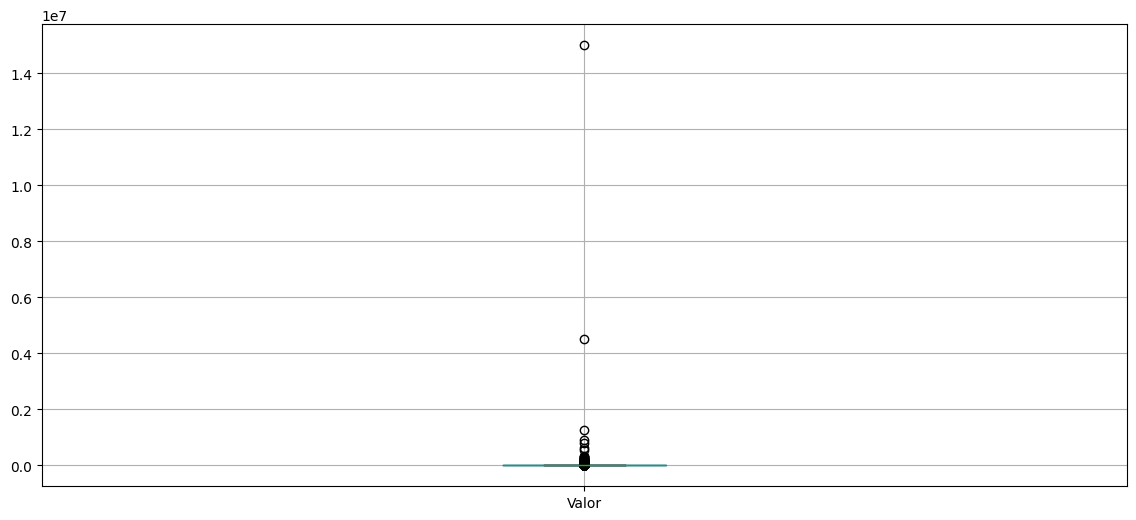

In [5]:
datos.boxplot(["Valor"])

In [6]:
datos[datos["Valor"] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
3141,Almacén,El Agustino,0,5,0,1100,15000000.0,0.0,1000.0
7946,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0
11077,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0
12135,Almacén,Pachacámac,0,83,0,34677,898134.0,0.0,0.0
13199,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0
14429,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0
16162,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0


In [10]:
valor = datos["Valor"]

In [11]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5*IIQ)
limite_superior = Q3 + (1.5*IIQ)

In [12]:
seleccion = ((valor >= limite_inferior) & (valor <= limite_superior))

In [13]:
datos_new = datos[seleccion]

<Axes: >

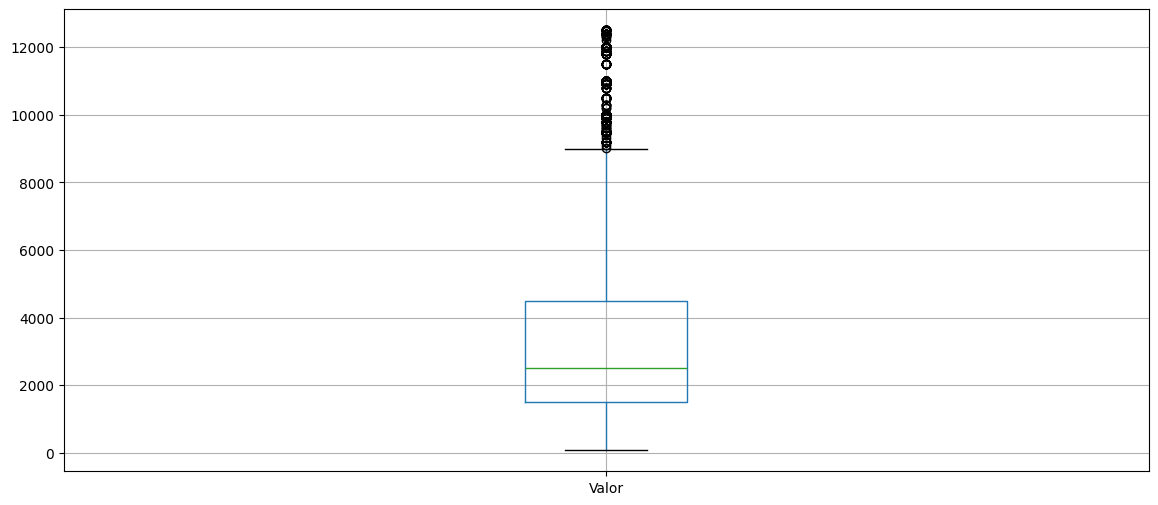

In [14]:
datos_new.boxplot(["Valor"])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

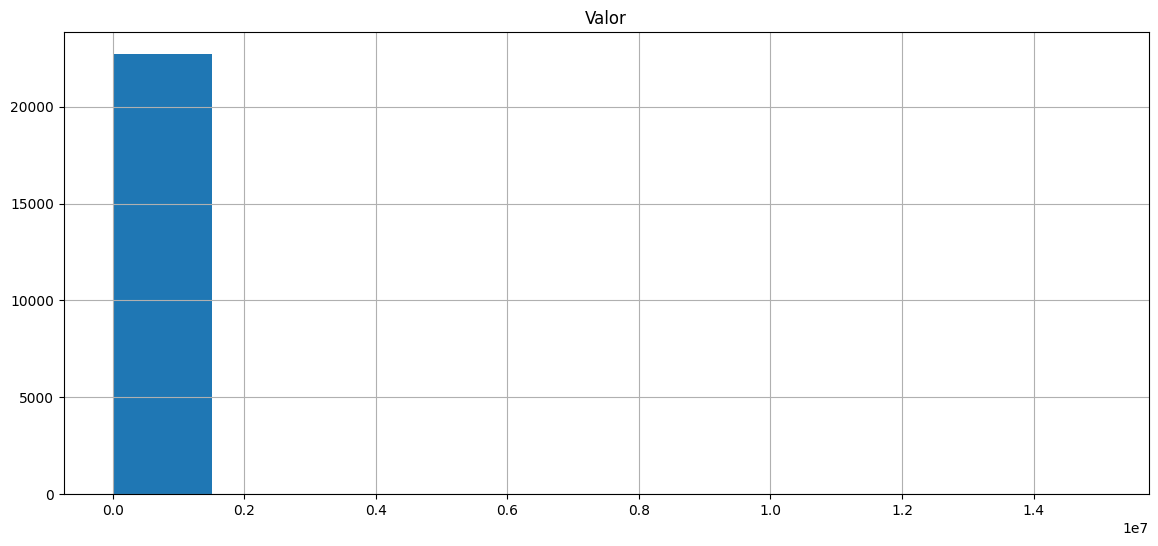

In [15]:
datos.hist(["Valor"])

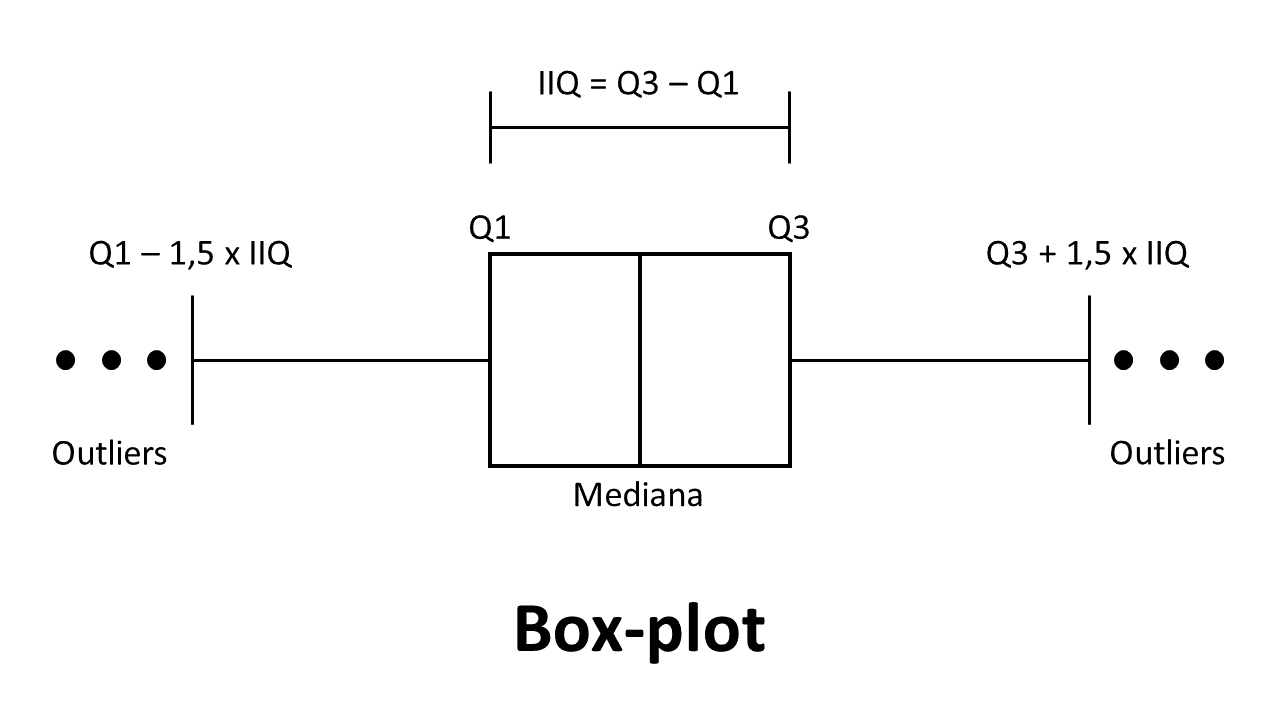

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

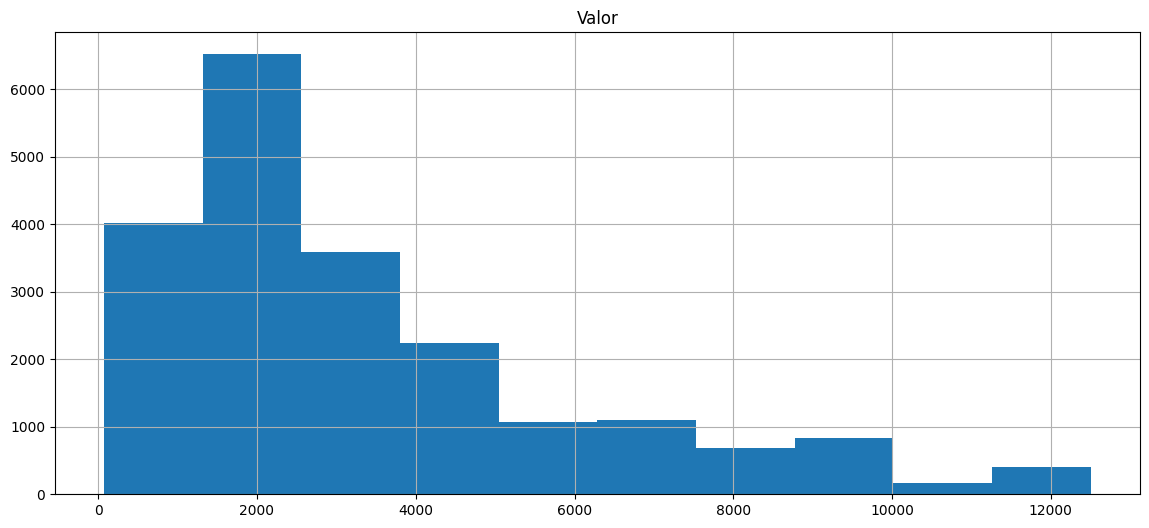

In [16]:
datos_new.hist(["Valor"])